# [함수](https://ko.javascript.info/function-basics)

## 함수 선언

- 함수 선언문

```javascript
function showMessage1() {
  alert( 'showMessage1' );
};
showMessage1();

sayHi("John"); // Hello, John
function sayHi(name) {
  alert( `Hello, ${name}` );
}
```

- 함수 표현식

```javascript
let showMessage2 = function () {
  alert( 'showMessage2' );
};
showMessage2();

sayHi("John"); // error!
let sayHi = function(name) {  // (*) 마술은 일어나지 않습니다.
  alert( `Hello, ${name}` );
};
```

## 지역 변수

```javascript
function showMessage() {
  let message = "안녕하세요!"; // 지역 변수

  alert( message );
}

showMessage(); // 안녕하세요!

alert( message ); // ReferenceError: message is not defined (message는 함수 내 지역 변수이기 때문에 에러가 발생합니다.)
```

## 외부 변수

```javascript
let userName = 'John';

function showMessage() {
  let message = 'Hello, ' + userName;
  alert(message);
}

showMessage(); // Hello, John
```

- 수정도 가능하다.

```javascript
let userName = 'John';

function showMessage() {
  userName = "Bob"; // (1) 외부 변수를 수정함

  let message = 'Hello, ' + userName;
  alert(message);
}

alert( userName ); // 함수 호출 전이므로 John 이 출력됨

showMessage();

alert( userName ); // 함수에 의해 Bob 으로 값이 바뀜
```

- 외부변수는 지역 변수가 없는 경우에만 사용가능하다.

```javascript
let userName = 'John';

function showMessage() {
  let userName = "Bob"; // 같은 이름을 가진 지역 변수를 선언합니다.

  let message = 'Hello, ' + userName; // Bob
  alert(message);
}

// 함수는 내부 변수인 userName만 사용합니다,
showMessage();

alert( userName ); // 함수는 외부 변수에 접근하지 않습니다. 따라서 값이 변경되지 않고, John이 출력됩니다.
```

## 매개 변수

```javascript
function showMessage(from, text) { // 인자: from, text
  alert(from + ': ' + text);
}

showMessage('Ann', 'Hello!'); // Ann: Hello! (*)
showMessage('Ann', "What's up?"); // Ann: What's up? (**)
```

- 나머지 매개변수

```javascript
function sum(a, b) {
  return a + b;
}

alert( sum(1, 2, 3, 4, 5) ); // 3
```

```javascript
function sumAll(...args) { // args는 배열의 이름입니다.
  let sum = 0;

  for (let arg of args) sum += arg;

  return sum;
}

alert( sumAll(1) ); // 1
alert( sumAll(1, 2) ); // 3
alert( sumAll(1, 2, 3) ); // 6
```

- 스프레드 문법     
지금까지 매개변수 목록을 배열로 가져오는 방법에 대해 살펴보았습니다.     
그런데 개발을 하다 보면 반대되는 기능이 필요할 때가 생깁니다. 배열을 통째로 매개변수에 넘겨주는 것 같이 말이죠.    

```javascript
// Math.max는 인수로 받은 숫자 중 가장 큰 숫자를 반환합니다.
alert( Math.max(3, 5, 1) ); // 5
```

아무런 조작 없이 배열을 ‘있는 그대로’ Math.max에 넘기면 원하는 대로 동작하지 않습니다.       
Math.max는 배열이 아닌 숫자 목록을 인수로 받기 때문입니다.
```javascript
let arr = [3, 5, 1];
alert( Math.max(arr) ); // NaN
```

스프레드 문법이 배열을 인수 목록으로 바꿔주었습니다.
```javascript
let arr = [3, 5, 1];
alert( Math.max(...arr) ); // 5 

let arr1 = [1, -2, 3, 4];
let arr2 = [8, 3, -8, 1];
alert( Math.max(1, ...arr1, 2, ...arr2, 25) ); // 25

let arr = [3, 5, 1];
let arr2 = [8, 9, 15];
let merged = [0, ...arr, 2, ...arr2];
alert(merged); // 0,3,5,1,2,8,9,15 (0, arr, 2, arr2 순서로 합쳐집니다.)
```

## 기본값

```javascript
function showMessage(from, text = "no text given") {
  alert( from + ": " + text );
}
showMessage("Ann"); // Ann: no text given


function showMessage(from, text) {
  if (text === undefined) {
    text = 'no text given';
  }

  alert( from + ": " + text );
}
showMessage("Ann"); // Ann: no text given
```

## 반환

```javascript
function sum(a, b) {
  return a + b;
}

let result = sum(1, 2);
alert( result ); // 3
```

```javascript
function checkAge(age) {
  if (age >= 18) {
    return true;
  } else {
    return confirm('보호자의 동의를 받으셨나요?');
  }
}

let age = prompt('나이를 알려주세요', 18);

if ( checkAge(age) ) {
  alert( '접속 허용' );
} else {
  alert( '접속 차단' );
}
```

# [함수 심화](https://ko.javascript.info/advanced-functions)

## [화살표 함수](https://ko.javascript.info/arrow-functions-basics)

```javascript
let sum = (a, b) => a + b;

/* 위 화살표 함수는 아래 함수의 축약 버전입니다.

let sum = function(a, b) {
  return a + b;
};
*/

alert( sum(1, 2) ); // 3
```
```javascript
let double = n => n * 2;
// let double = function(n) { return n * 2 }과 거의 동일합니다.

alert( double(3) ); // 6
```
```javascript
let sayHi = () => alert("안녕하세요!");

sayHi();
```
```javascript
let sum = (a, b) => {  // 중괄호는 본문 여러 줄로 구성되어 있음을 알려줍니다.
  let result = a + b;
  return result; // 중괄호를 사용했다면, return 지시자로 결괏값을 반환해주어야 합니다.
};

alert( sum(1, 2) ); // 3
```

## [콜백함수](https://ko.javascript.info/function-expressions)
콜백(Callback) 함수는 간단히 말하면 매개변수로 함수 객체를 전달해서 호출 함수 내에서 매개변수 함수를 실행하는 것을 말한다. 

```javascript
function ask(question, yes, no) {
  if (confirm(question)) yes()
  else no();
}

function showOk() {
  alert( "동의하셨습니다." );
}

function showCancel() {
  alert( "취소 버튼을 누르셨습니다." );
}

// 사용법: 함수 showOk와 showCancel가 ask 함수의 인수로 전달됨
ask("동의하십니까?", showOk, showCancel);
```

```javascript
function ask(question, yes, no) {
  if (confirm(question)) yes()
  else no();
}

ask(
  "동의하십니까?",
  function() { alert("동의하셨습니다."); },
  function() { alert("취소 버튼을 누르셨습니다."); }
);
```

## [재귀함수](https://ko.javascript.info/recursion#ref-70)
문제 해결을 하다 보면 함수에서 다른 함수를 호출해야 할 때가 있습니다. 이때 함수가 자기 자신을 호출할 수도 있는데, 이를 재귀 라고 부릅니다.

```javascript
function pow(x, n) {
  if (n == 1) {
    return x;
  } else {
    return x * pow(x, n - 1);
  }
}

alert( pow(2, 3) ); // 8
```


pow (x, n)을 호출하면 아래와 같이 두 갈래로 나뉘어 코드가 실행됩니다.
1. n == 1일 때: 모든 절차가 간단해집니다. 명확한 결괏값을 즉시 도출하므로 이를 재귀의 베이스(base) 라고 합니다. pow(x, 1)는 x 입니다.
2. n == 1이 아닐 때: pow(x, n)은 x * pow(x, n - 1)으로 표현할 수 있습니다. 수학식으론 xn = x * xn-1로 표현할 수 있겠죠. 이를 재귀 단계(recursive step) 라고 부릅니다. 

여기선 목표 작업 pow(x, n)을 간단한 동작(x를 곱하기)과 목표 작업을 변형한 작업(pow(x, n - 1))으로 분할하였습니다. 재귀 단계는 n이 1이 될 때까지 계속 이어집니다.

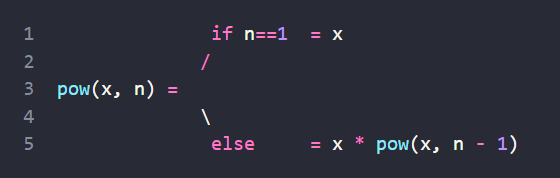

## [클로저 함수](https://developer.mozilla.org/ko/docs/Web/JavaScript/Closures)

- 유효범위(scope)    
클로저는 함수와 함수가 선언된 어휘적 환경의 조합이다. 클로저를 이해하려면 자바스크립트가 어떻게 변수의 유효범위를 지정하는지(Lexical scoping)를 먼저 이해해야 한다.

```javascript
function init() {
  let name = "Mozilla"; // name은 init에 의해 생성된 지역 변수이다.

  function displayName() { // displayName() 은 내부 함수이며, 클로저다.
    let age = 33; // 클로저 함수(displayName) 내부에 생성된 지역 변수이다.
    alert(name); // 부모 함수에서 선언된 변수를 사용한다.
    alert(age);
  }
  displayName();

  // 클로저 함수(displayName)의 지역변수는 사용할 수 없다.
  alert(age); // error 발생 

}

init();
```


- 클로저 예제들 

```javascript
function makeCounter() {
  let count = 0;

  return function() {
    return count++;
  };
}

let counter = makeCounter();

alert( counter() ); // 0
alert( counter() ); // 1
alert( counter() ); // 2
```

```javascript
function makeAdder(x) {
  var y = 1;
  return function(z) {
    y = 100;
    return x + y + z;
  };
}

var add5 = makeAdder(5);
var add10 = makeAdder(10);
//클로저에 x와 y의 환경이 저장됨

console.log(add5(2));  // 107 (x:5 + y:100 + z:2)
console.log(add10(2)); // 112 (x:10 + y:100 + z:2)
//함수 실행 시 클로저에 저장된 x, y값에 접근하여 값을 계산
```

## [호출 스케줄링](https://ko.javascript.info/settimeout-setinterval)
일정 시간이 지난 후에 원하는 함수를 예약 실행(호출)할 수 있게 하는 것을 '호출 스케줄링(scheduling a call)'이라고 합니다.

호출 스케줄링을 구현하는 방법은 두 가지가 있습니다.
- `setTimeout`을 이용해 일정 시간이 지난 후에 함수를 실행하는 방법
- `setInterval`을 이용해 일정 시간 간격을 두고 함수를 실행하는 방법

### setTimeout

```javascript
function sayHi() {
  alert('안녕하세요.');
}

setTimeout(sayHi, 1000);
```

```javascript
function sayHi(who, phrase) {
  alert( who + ' 님, ' + phrase );
}

setTimeout(sayHi, 1000, "홍길동", "안녕하세요."); // 홍길동 님, 안녕하세요.
```

```javascript
setTimeout("alert('안녕하세요.')", 1000);
```

```javascript
setTimeout(() => alert('안녕하세요.'), 1000);
```

### clearTimeout
setTimeout을 호출하면 '타이머 식별자(timer identifier)'가 반환됩니다. 스케줄링을 취소하고 싶을 땐 이 식별자(아래 예시에서 timerId)를 사용하면 됩니다.

```javascript
let timerId = setTimeout(() => alert("아무런 일도 일어나지 않습니다."), 1000);
alert(timerId); // 타이머 식별자

clearTimeout(timerId);
alert(timerId); // 위 타이머 식별자와 동일함 (취소 후에도 식별자의 값은 null이 되지 않습니다.)
```

### setInterval

```javascript
// 2초 간격으로 메시지를 보여줌
let timerId = setInterval(() => alert('째깍'), 2000);

// 5초 후에 정지
setTimeout(() => { clearInterval(timerId); alert('정지'); }, 5000);
```